# Semantic Segmentation (regimes) with arc curves # 
“arc curve” annotates the raw time series with information about the likelihood of a regime change.

https://stumpy.readthedocs.io/en/latest/Tutorial_Semantic_Segmentation.html

https://sites.google.com/site/onlinesemanticsegmentation/

In [46]:
# SETUP
from tssb.utils import load_time_series_segmentation_datasets
from tssb.evaluation import covering
import pandas as pd
import stumpy

import matplotlib.pyplot as plt
from tssb.utils import visualize_time_series

## Time Series Segmentation Benchmark (TSSB) ##

https://github.com/ermshaua/time-series-segmentation-benchmark

In [47]:
# Parameters
d = 2
data_name = "CinCECGTorso"

tssb = load_time_series_segmentation_datasets(data_name)

### known number of change points ###
Hyperparameter:
- excl_factor (default: 5)
- L
- n_regimes

In [48]:
# calculate
for _, (ts_name, window_size, cps, ts) in tssb.iterrows():
    target_w = None
    m = window_size
    if target_w:
        calculate_m = True
    else:
        calculate_m = False

    if calculate_m:
        m = round((target_w-1)/d) + 1
    actual_w = (m-1)*d + 1
    n_regimes = len(cps)+1
    if d == 1:
        mp = stumpy.stump(ts, m=m)
    else:
        mp = stumpy.stump_dil(ts, m=m, d=d)
    cac, found_cps = stumpy.fluss(mp[:, 1], L=window_size, n_regimes=n_regimes)


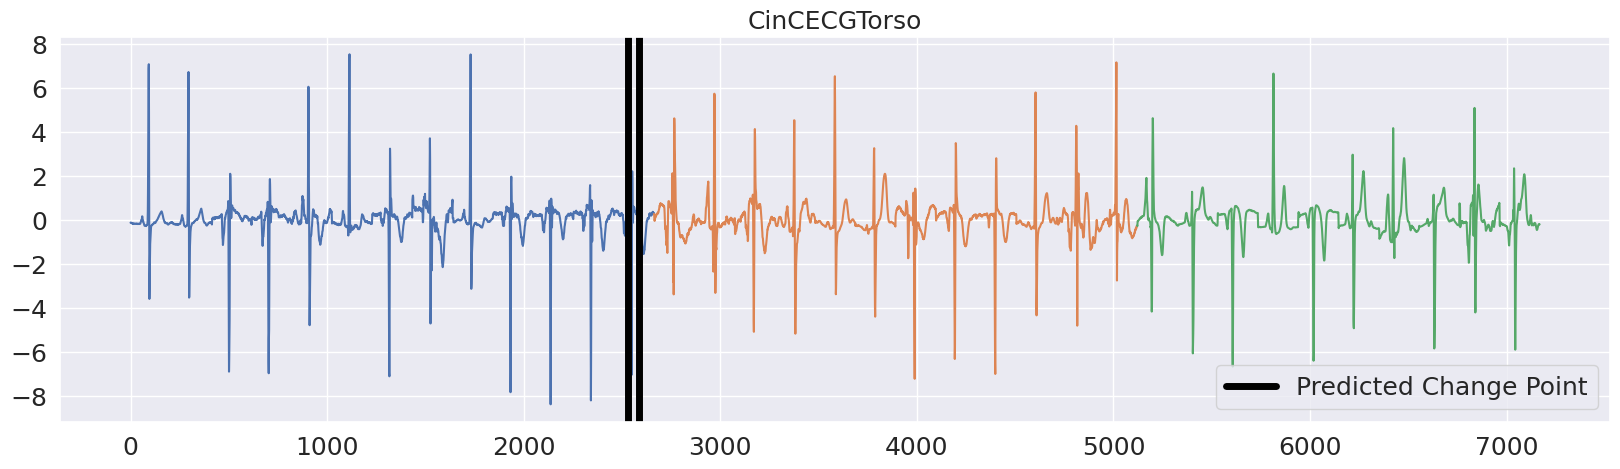

In [49]:
fig, ax = visualize_time_series(ts, ts_name, cps, found_cps)

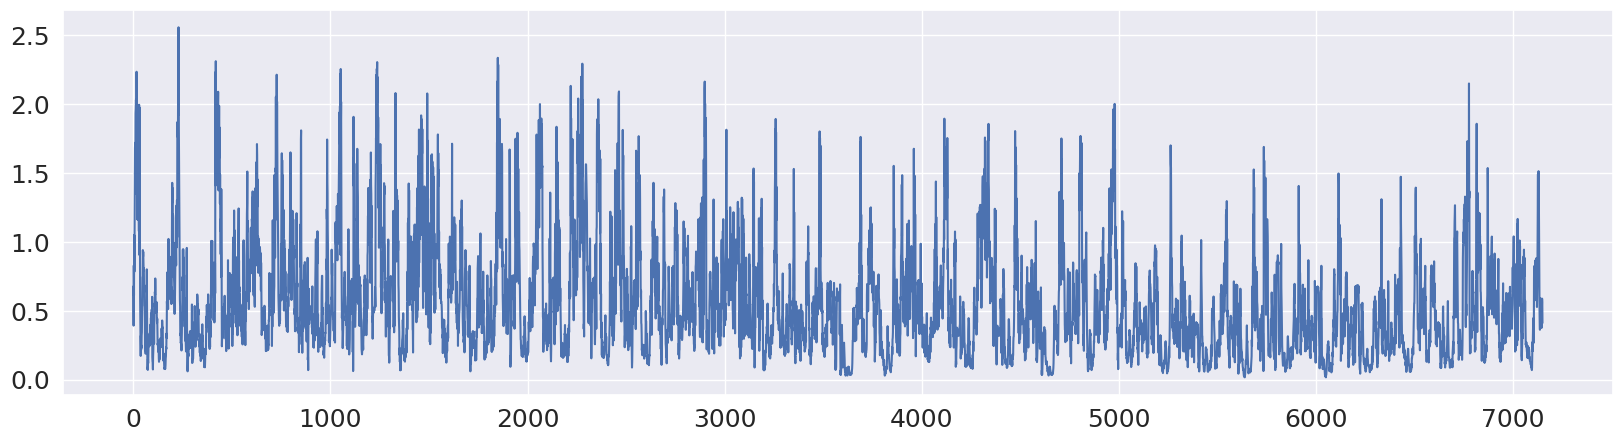

In [50]:
plt.figure(figsize=(20, 5))
plt.plot(mp[:, 0])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

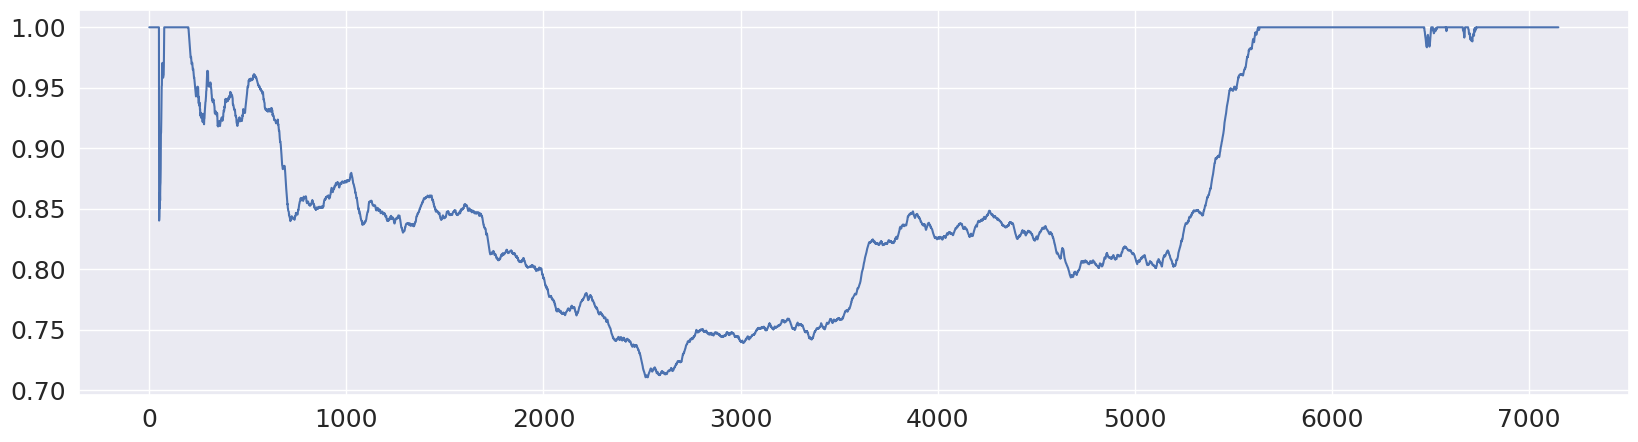

In [51]:
plt.figure(figsize=(20, 5))
plt.plot(cac)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()